# Importing the Libraries

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import RMSprop

# Loading the dataset

In [18]:
(X_train,Y_train),(X_test,Y_test) = mnist.load_data()

# Shape of data

In [19]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)


(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


# Normalizing the Data

In [21]:
X_train = X_train.reshape(60000,28,28,1)/255.0
X_test = X_test.reshape(10000,28,28,1)/255.0

# Converting the Target variable into categorical variable

In [9]:
Y_train = to_categorical(Y_train)
Y_test = to_categorical(Y_test)

# Creating a Model

In [22]:
model = Sequential()
model.add(layers.Conv2D(64,(3,3),activation = "relu",input_shape = (28,28,1)))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(64,(3,3),activation = "relu"))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Flatten())
model.add(layers.Dense(64,activation = "relu"))
model.add(layers.Dense(10,activation = "softmax"))

In [23]:
model.compile(optimizer=RMSprop(lr = 0.001),loss = "sparse_categorical_crossentropy",metrics = ["accuracy"])

In [24]:
model.fit(X_train,Y_train,epochs = 30, batch_size = 128)

Epoch 1/30
469/469 [==============================] - 6s 11ms/step - loss: 1.8205 - accuracy: 0.3811
Epoch 2/30
469/469 [==============================] - 5s 11ms/step - loss: 0.4321 - accuracy: 0.8678
Epoch 3/30
469/469 [==============================] - 5s 10ms/step - loss: 0.2828 - accuracy: 0.9146
Epoch 4/30
469/469 [==============================] - 5s 10ms/step - loss: 0.1841 - accuracy: 0.9443
Epoch 5/30
469/469 [==============================] - 5s 10ms/step - loss: 0.1280 - accuracy: 0.9617
Epoch 6/30
469/469 [==============================] - 5s 10ms/step - loss: 0.1012 - accuracy: 0.9693
Epoch 7/30
469/469 [==============================] - 5s 10ms/step - loss: 0.0837 - accuracy: 0.9744
Epoch 8/30
469/469 [==============================] - 5s 10ms/step - loss: 0.0727 - accuracy: 0.9765
Epoch 9/30
469/469 [==============================] - 5s 10ms/step - loss: 0.0663 - accuracy: 0.9798
Epoch 10/30
469/469 [==============================] - 5s 10ms/step - loss: 0.0572 - accura

# Evaluating the Model on test Data set

In [25]:
model.evaluate(X_test,Y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.0462 - accuracy: 0.9870


[0.04616699367761612, 0.9869999885559082]

# Looking at some pictures in dataset

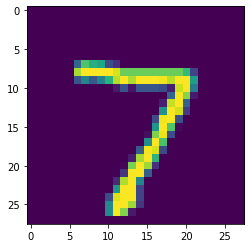

It is Seven and model predicted it as a Seven


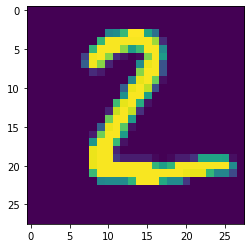

It is Two and model predicted it as a Two


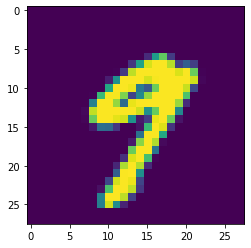

It is Nine and model predicted it as a Nine


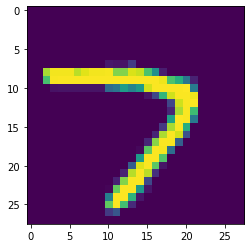

It is Seven and model predicted it as a Seven


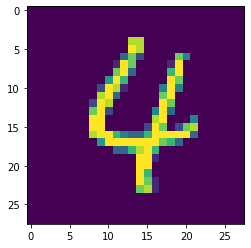

It is Four and model predicted it as a Four


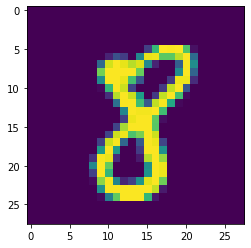

It is Eight and model predicted it as a Eight


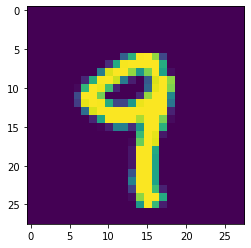

It is Nine and model predicted it as a Nine


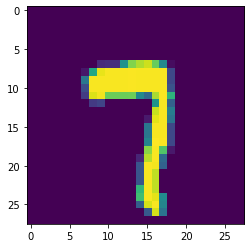

It is Seven and model predicted it as a Seven


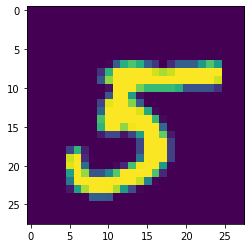

It is Five and model predicted it as a Five


In [27]:
for i in [0,1, 20, 70, 109, 134, 598 , 1006 , 9988]:
  Map_dictionary = {0: "Zero", 1: "One", 2: "Two", 3: "Three", 4: "Four", 5: "Five" , 6: "Six",7: "Seven", 8: "Eight", 9: "Nine"}
  image = X_test[i,:].reshape(28,28)
  plt.imshow(image)
  plt.show()
  predict = model.predict(X_test)
  print("It is "+Map_dictionary[Y_test[i]] + " and model predicted it as a " + Map_dictionary[np.argmax(predict[i])])
